In [1]:
# Import libraries
library(data.table)
library(stringr)
library(ggplot2)
library(dplyr)

In [2]:
# Create relatove paths for the test and train data files for use amongst all group members
testPath <- file.path(".","databases","test.tsv")
trainPath <- file.path(".","databases","train.tsv")

In [3]:
# Read in the data files using data.table's fread
test <- fread(testPath)
train <- fread(trainPath)

In [4]:
# Creating summaries of the data helps us get a look at our data before we begin charting and attempting to analyze it
summary(train)

    train_id         name           item_condition_id category_name     
 Min.   :    0   Length:29999       Min.   :1.000     Length:29999      
 1st Qu.: 7500   Class :character   1st Qu.:1.000     Class :character  
 Median :14999   Mode  :character   Median :2.000     Mode  :character  
 Mean   :14999                      Mean   :1.906                       
 3rd Qu.:22499                      3rd Qu.:3.000                       
 Max.   :29998                      Max.   :5.000                       
  brand_name            price            shipping      item_description  
 Length:29999       Min.   :   0.00   Min.   :0.0000   Length:29999      
 Class :character   1st Qu.:  10.00   1st Qu.:0.0000   Class :character  
 Mode  :character   Median :  17.00   Median :0.0000   Mode  :character  
                    Mean   :  26.95   Mean   :0.4477                     
                    3rd Qu.:  29.00   3rd Qu.:1.0000                     
                    Max.   :1506.00   Max.   

In [5]:
#Summary of data
summary(test)

    test_id          name           item_condition_id category_name     
 Min.   :    0   Length:29999       Min.   :1.000     Length:29999      
 1st Qu.: 7500   Class :character   1st Qu.:1.000     Class :character  
 Median :14999   Mode  :character   Median :2.000     Mode  :character  
 Mean   :14999                      Mean   :1.911                       
 3rd Qu.:22499                      3rd Qu.:3.000                       
 Max.   :29998                      Max.   :5.000                       
  brand_name           shipping      item_description  
 Length:29999       Min.   :0.0000   Length:29999      
 Class :character   1st Qu.:0.0000   Class :character  
 Mode  :character   Median :0.0000   Mode  :character  
                    Mean   :0.4484                     
                    3rd Qu.:1.0000                     
                    Max.   :1.0000                     

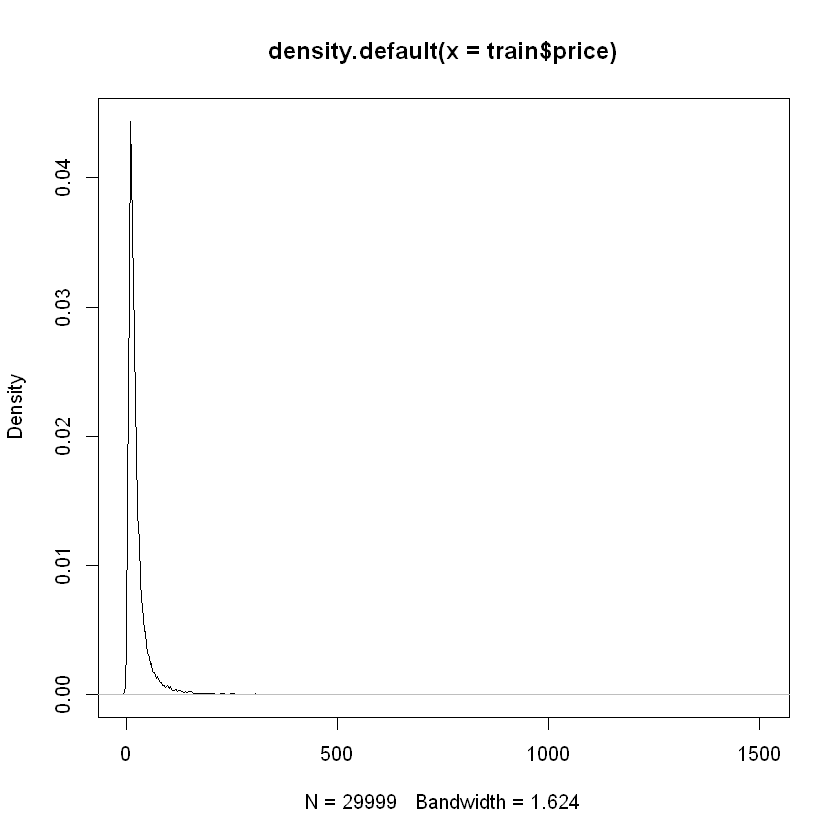

In [6]:
# Plot density graph of the training data
plot(density(train$price))

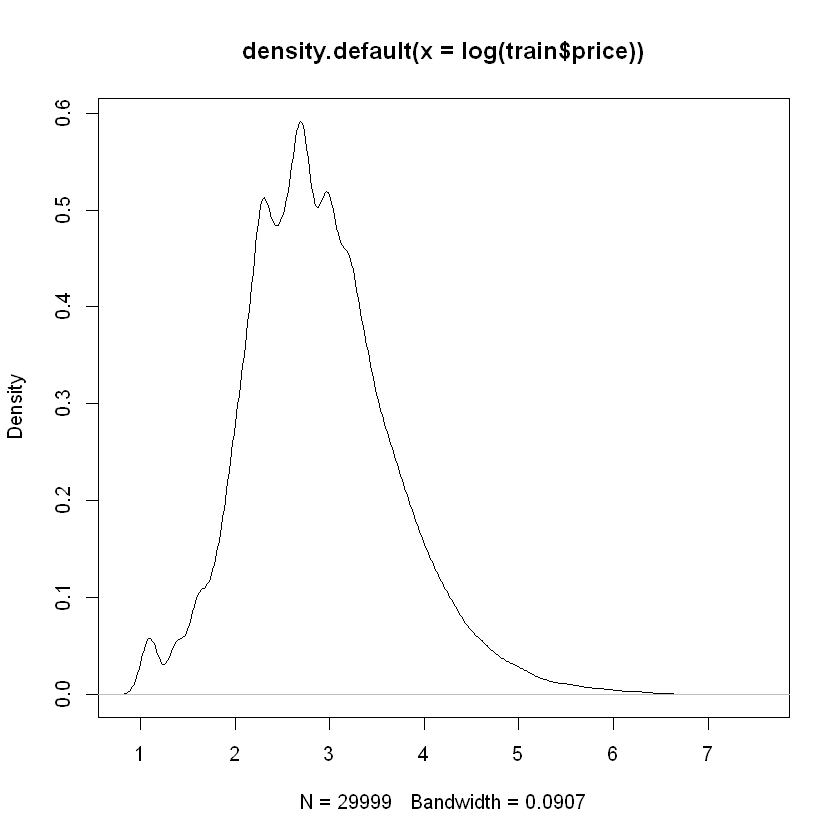

In [7]:
# Normal data is difficult to read due to outliers, the log of the data helps with visualization
plot(density(log(train$price)))

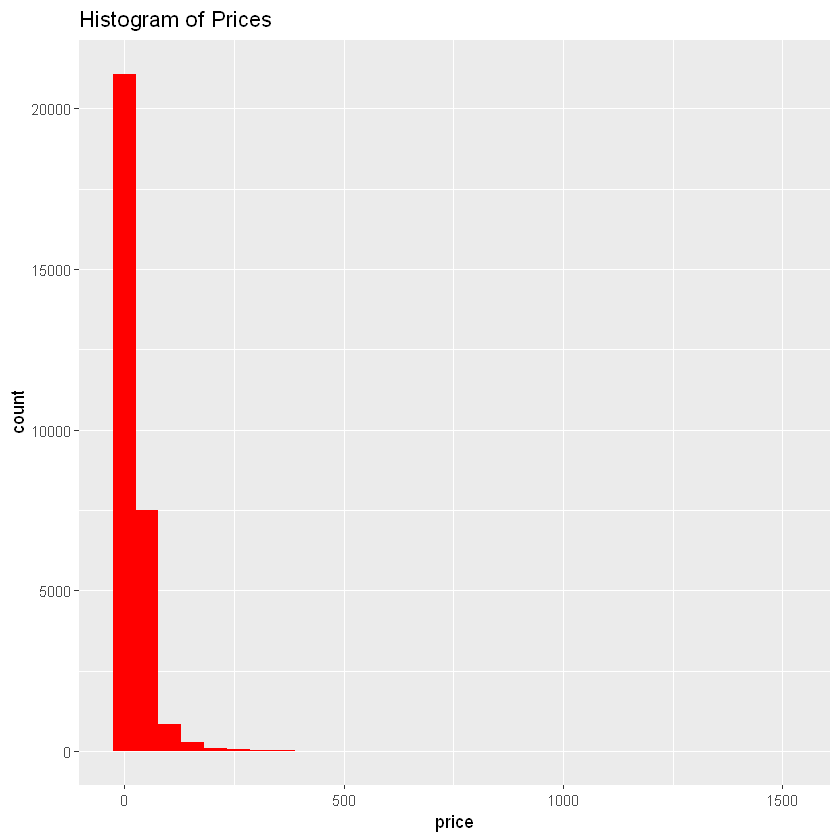

In [8]:
# Histogram of the data, sorting into bins
ggplot(data=train,aes(x=price)) + 
  geom_histogram(fill='red',bins=30) + 
  labs(title='Histogram of Prices')

Warning message:
"Removed 23 rows containing non-finite values (stat_bin)."


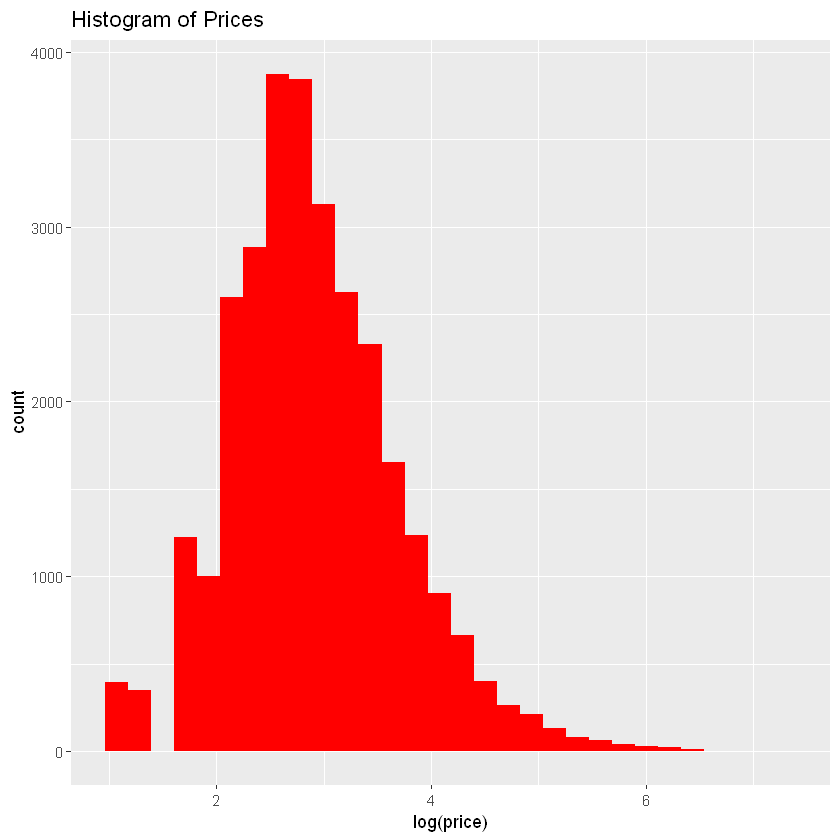

In [9]:
# Log of the data put into a histogram, helps visualize the data spread similar to the plot density
ggplot(data=train,aes(x=log(price))) + 
  geom_histogram(fill='red',bins=30) + 
  labs(title='Histogram of Prices')

In [10]:
# Creates a listing of all categories and number of items associated with them
# They are currently sorted alphabetically but could be sorted using other methods such as quantity
table(train$category_name)

unique(train$category_name)

length(unique(train$category_name))

sort(table(train$category_name),decreasing = T)[1:10]


                                                                  
                                                              145 
                                          Beauty/Bath & Body/Bath 
                                                              107 
                           Beauty/Bath & Body/Bathing Accessories 
                                                                5 
                                     Beauty/Bath & Body/Cleansers 
                                                               13 
                                         Beauty/Bath & Body/Other 
                                                                1 
                      Beauty/Bath & Body/Scrubs & Body Treatments 
                                                               17 
                                          Beauty/Bath & Body/Sets 
                                                               14 
                           Beauty/Fragrance/Candles & Home Sc

[1] "Men/Tops/T-shirts"                                                
  [2] "Electronics/Computers & Tablets/Components & Parts"               
  [3] "Women/Tops & Blouses/Blouse"                                      
  [4] "Home/Home DÃ©cor/Home DÃ©cor Accents"                             
  [5] "Women/Jewelry/Necklaces"                                          
  [6] "Women/Other/Other"                                                
  [7] "Women/Swimwear/Two-Piece"                                         
  [8] "Sports & Outdoors/Apparel/Girls"                                  
  [9] "Vintage & Collectibles/Collectibles/Doll"                         
 [10] "Beauty/Makeup/Face"                                               
 [11] "Beauty/Fragrance/Women"                                           
 [12] "Women/Dresses/Above Knee, Mini"                                   
 [13] "Other/Office supplies/School Supplies"                            
 [14] "Women/Shoes/Boots"                                                
 [15] "Beauty/Makeup/Makeup Sets"                                        
 [16] "Beauty/Makeup/Eyes"                                               
 [17] "Kids/Gear/Backpacks & Carriers"                                   
 [18] "Beauty/Makeup/Makeup Palettes"                                    
 [19] "Women/Tops & Blouses/Tank, Cami"                                  
 [20] "Women/Athletic Apparel/Sports Bras"                               
 [21] "Electronics/Cell Phones & Accessories/Cell Phones & Smartphones"  
 [22] "Electronics/Cell Phones & Accessories/Chargers & Cradles"         
 [23] "Women/Tops & Blouses/T-Shirts"                                    
 [24] "Men/Shoes/Athletic"                                               
 [25] "Electronics/Cell Phones & Accessories/Cases, Covers & Skins"      
 [26] "Women/Athletic Apparel/Pants, Tights, Leggings"                   
 [27] "Women/Swimwear/One-Piece"                                         
 [28] "Women/Jeans/Boot Cut"                                             
 [29] "Women/Underwear/Bras"                                             
 [30] "Beauty/Skin Care/Face"                                            
 [31] "Kids/Toys/Stuffed Animals & Plush"                                
 [32] "Women/Women's Handbags/Totes & Shoppers"                          
 [33] "Men/Athletic Apparel/Shirts & Tops"                               
 [34] "Electronics/Video Games & Consoles/Consoles"                      
 [35] "Vintage & Collectibles/Collectibles/Glass"                        
 [36] "Women/Coats & Jackets/Vest"                                       
 [37] "Kids/Toys/Arts & Crafts"                                          
 [38] "Women/Pants/Capris, Cropped"                                      
 [39] "Women/Women's Handbags/Messenger & Crossbody"                     
 [40] "Kids/Girls (4+)/Shoes"                                            
 [41] "Vintage & Collectibles/Antique/Collectibles"                      
 [42] "Home/Kitchen & Dining/Coffee & Tea Accessories"                   
 [43] "Vintage & Collectibles/Jewelry/Brooch"                            
 [44] "Electronics/Cell Phones & Accessories/Headsets"                   
 [45] "Women/Jewelry/Rings"                                              
 [46] "Women/Athletic Apparel/Shorts"                                    
 [47] "Men/Coats & Jackets/Fleece Jacket"                                
 [48] "Kids/Toys/Dolls & Accessories"                                    
 [49] "Women/Sweaters/Crewneck"                                          
 [50] "Women/Athletic Apparel/Jackets"                                   
 [51] "Women/Shoes/Athletic"                                             
 [52] "Home/Home DÃ©cor/Home Fragrance"                                  
 [53] "Kids/Boys 0-24 Mos/Accessories"                                   
 [54] "Home/Home DÃ©cor/Other"                                           
 [55] 

[1] 808


             Women/Athletic Apparel/Pants, Tights, Leggings 
                                                       1211 
                              Women/Tops & Blouses/T-Shirts 
                                                        910 
                                         Beauty/Makeup/Face 
                                                        727 
                                         Beauty/Makeup/Lips 
                                                        669 
                                         Beauty/Makeup/Eyes 
                                                        549 
                   Electronics/Video Games & Consoles/Games 
                                                        527 
Electronics/Cell Phones & Accessories/Cases, Covers & Skins 
                                                        521 
                                       Women/Underwear/Bras 
                                                        431 
                       

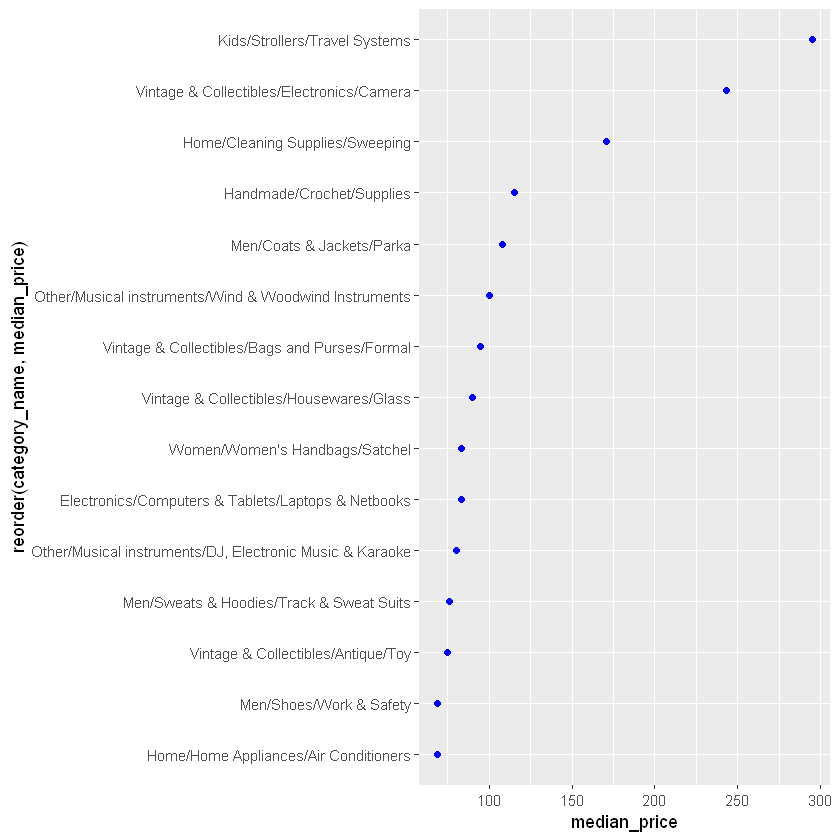

In [11]:
# Creates a chart listing the 15 highest selling price categories
train[,.(median_price = median(price)), by= category_name][order(median_price,decreasing = T)][1:15] %>%
  ggplot(aes(x=reorder(category_name,median_price),y=median_price)) +
  geom_point(color = 'blue') +
  coord_flip()

In [14]:
# Displays the categories split into level 1 and level 2
library(data.table)
train[,c('level1_cat','level2_cat') := tstrsplit(train$category_name,split='/',keep = c(1,2))]

head(train[,c('level1_cat','level2_cat')])

table(train$level1_cat)

table(train$level2_cat)

level1_cat,level2_cat
<chr>,<chr>
Men,Tops
Electronics,Computers & Tablets
Women,Tops & Blouses
Home,Home DÃ©cor
Women,Jewelry
Women,Other



                Beauty            Electronics               Handmade 
                  4338                   2508                    601 
                  Home                   Kids                    Men 
                  1349                   3393                   1864 
                 Other      Sports & Outdoors Vintage & Collectibles 
                   939                    500                    957 
                 Women 
                 13405 


              Accessories                   Antique                   Apparel 
                      165                       142                        62 
                      Art                   Artwork          Athletic Apparel 
                       13                        17                      2645 
               Automotive           Bags and Purses                      Bath 
                       48                       111                        28 
              Bath & Body       Bathing & Skin Care                   Bedding 
                      157                        17                        88 
    Blazers & Sport Coats                      Book                     Books 
                        2                        35                       166 
          Books and Zines                 Boys (4+)             Boys 0-24 Mos 
                        1                       292                       301 
               Boys 2T-5T     Cameras & Photography

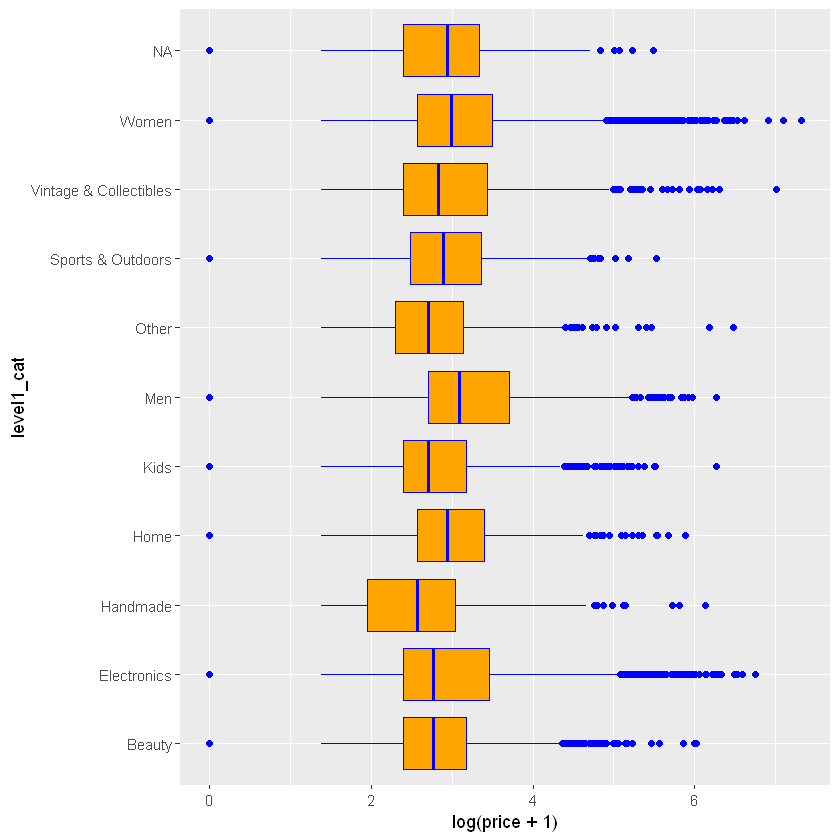

train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,level1_cat,level2_cat
<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,,10,1,No description yet,Men,Tops
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & Parts,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.,Electronics,Computers & Tablets
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!",Women,Tops & Blouses
3,Leather Horse Statues,1,Home/Home DÃ©cor/Home DÃ©cor Accents,,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage,Home,Home DÃ©cor
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,,44,0,Complete with certificate of authenticity,Women,Jewelry
5,Bundled items requested for Ruie,3,Women/Other/Other,,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top.",Women,Other


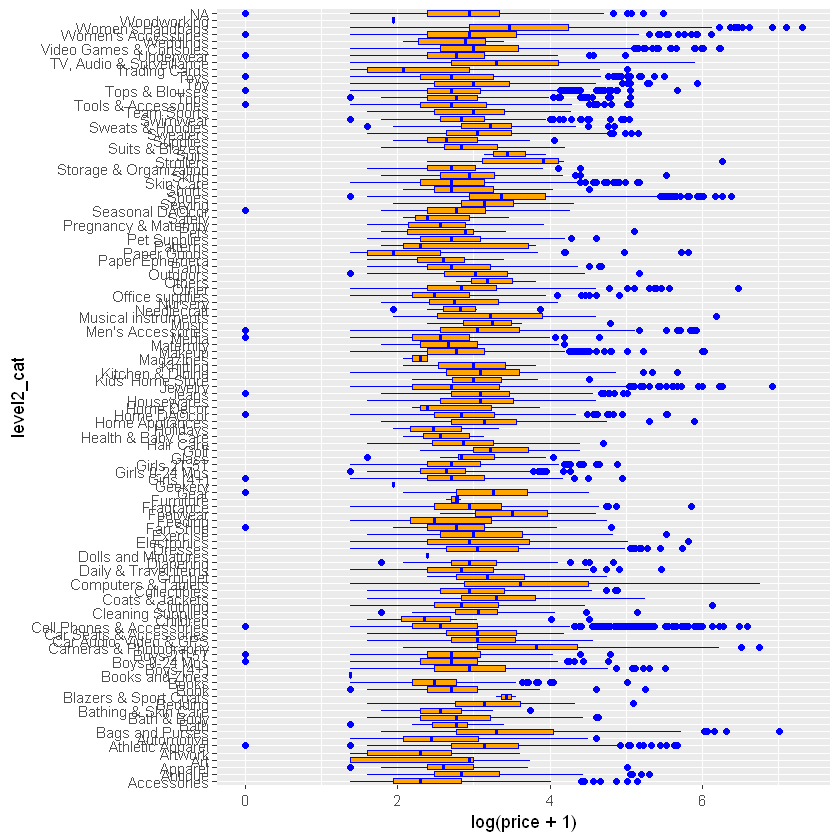

In [13]:
# The average prices of each level 1 category overall and each level 2 category
train %>%
ggplot(aes(x=level1_cat,y=log(price+1))) +
  geom_boxplot(fill='orange',color = 'blue') +
  coord_flip() 

train %>%
  ggplot(aes(x=level2_cat,y=log(price+1))) +
  geom_boxplot(fill='orange',color = 'blue') +
  coord_flip() 

head(train)


In [3]:
#Product categories with the highest selling price?
train[,.(median_price = median(price)), by= category_name][order(median_price,decreasing = T)][1:15] %>%
  ggplot(aes(x=reorder(category_name,median_price),y=median_price)) +
  geom_point(color = 'blue') +
  coord_flip()

ERROR: Error in train[, .(median_price = median(price)), by = category_name][order(median_price, : could not find function "%>%"
